In [1]:
%pip install --upgrade caer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 53.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import caer

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import cv2 as cv
import gc

In [3]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

# find how to  use kaggle dataset inside google collab
# kaggle datasets download -d alexattia/the-simpsons-characters-dataset

In [5]:
# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [7]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [8]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 3.4819626808166504s
[INFO] At 1000 files
[INFO] 1454 files found in 1.0994524955749512s
[INFO] At 1000 files
[INFO] 1452 files found in 1.1048283576965332s
[INFO] At 1000 files
[INFO] 1354 files found in 0.7880837917327881s
[INFO] At 1000 files
[INFO] 1342 files found in 0.660982608795166s
[INFO] At 1000 files
[INFO] 1291 files found in 0.5775802135467529s
[INFO] At 1000 files
[INFO] 1206 files found in 0.22844767570495605s
[INFO] At 1000 files
[INFO] 1194 files found in 0.20774626731872559s
[INFO] At 1000 files
[INFO] 1193 files found in 0.15873479843139648s
[INFO] At 1000 files
[INFO] 1079 files found in 0.003545999526977539s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 26s


In [9]:
# Number of training samples
len(train)

13811

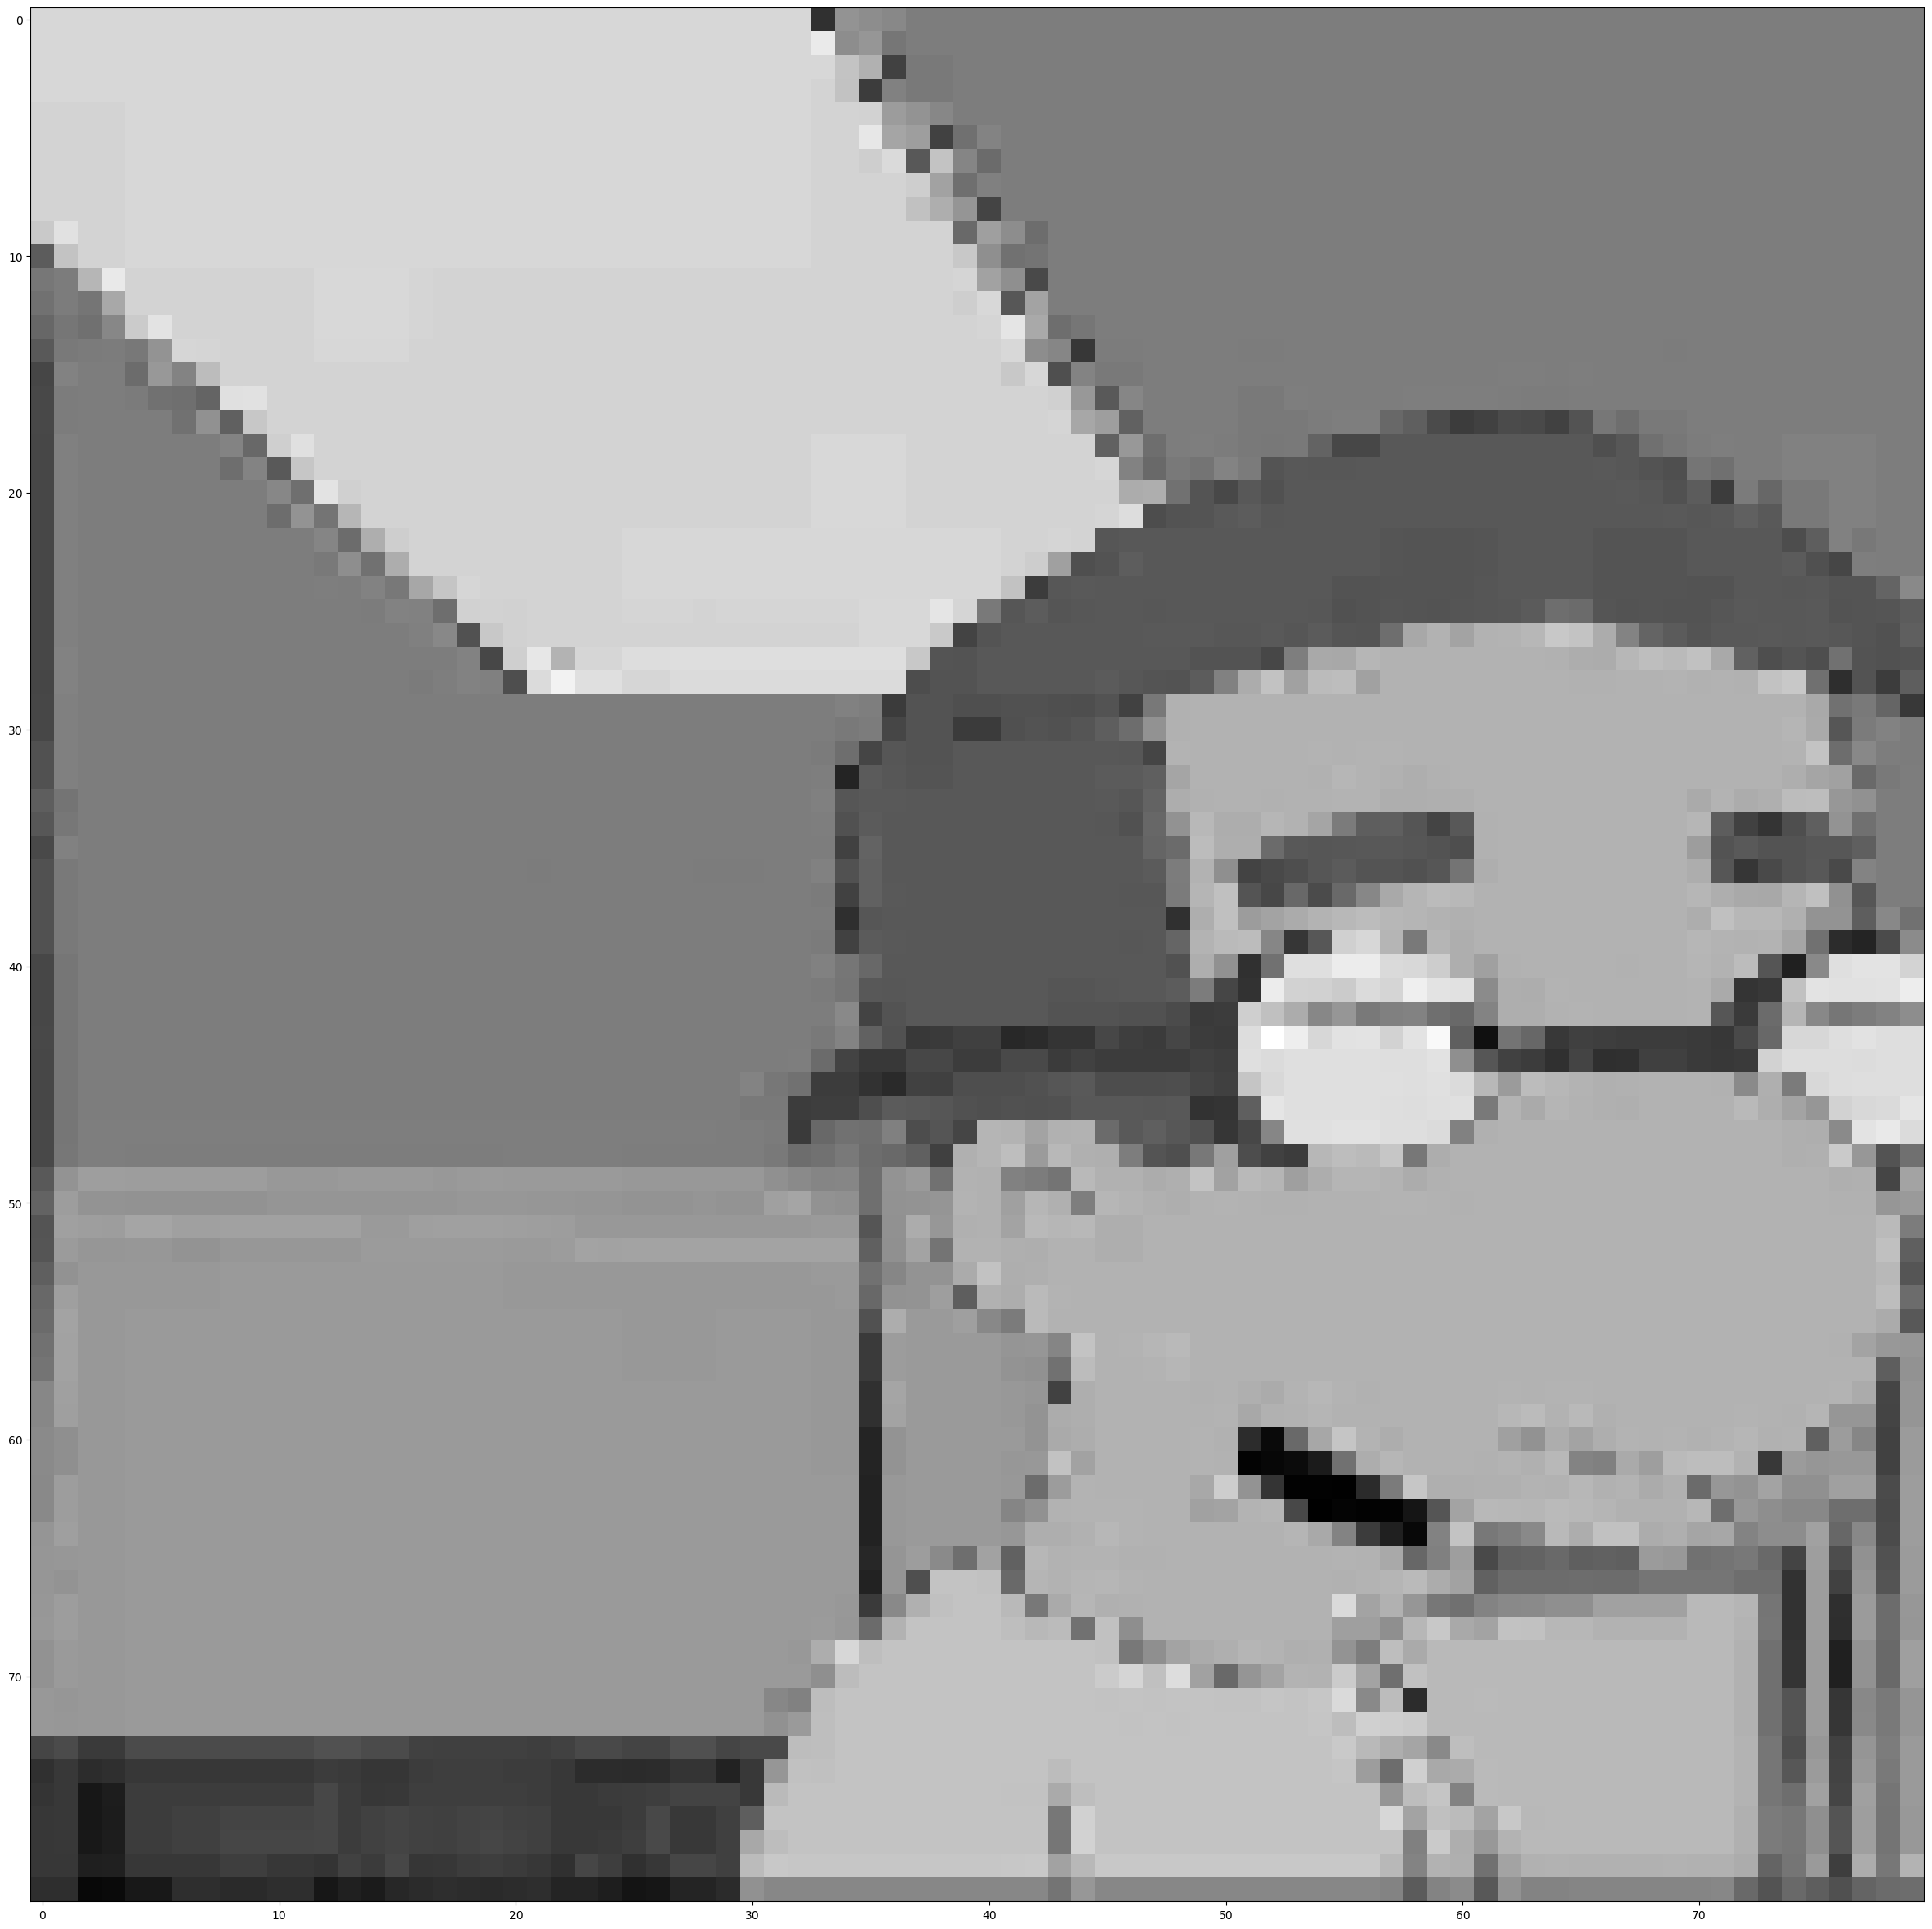

In [10]:
# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [11]:
# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [12]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [13]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [19]:
del train
del featureSet
del labels 
gc.collect()

132

In [20]:
# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

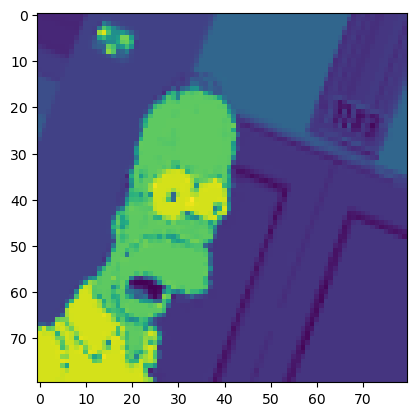

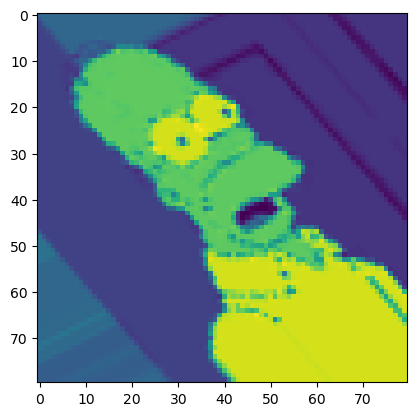

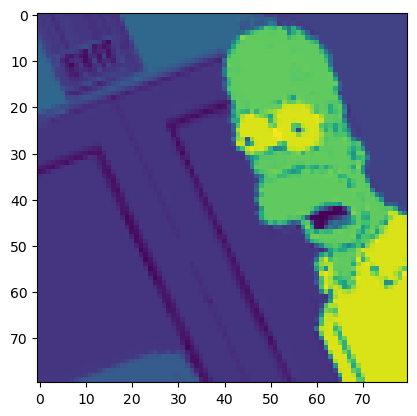

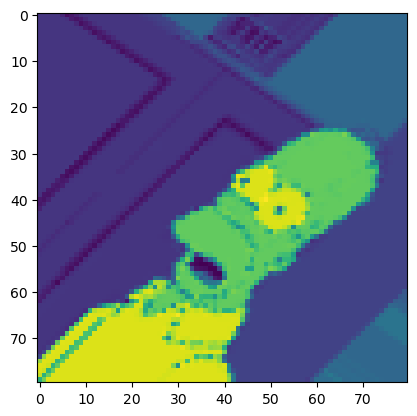

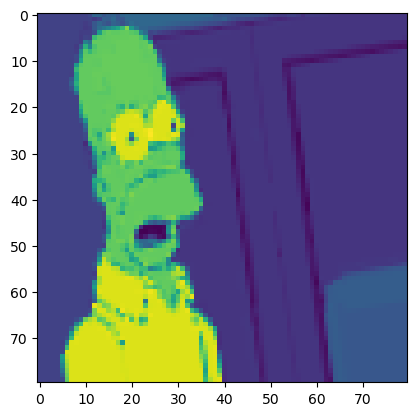

In [50]:
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = x_train[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80,80, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [52]:
model.summary()  # let's have a look at our model so far

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [53]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 16384)            

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [56]:
history = model.fit(x_train, y_train, epochs=4, 
                    validation_data=(x_val, y_val))

Epoch 1/4
346/346 [==============================] - 4s 7ms/step - loss: 0.3086 - accuracy: 0.2435 - val_loss: 0.2724 - val_accuracy: 0.3792
Epoch 2/4
346/346 [==============================] - 2s 6ms/step - loss: 0.2544 - accuracy: 0.4342 - val_loss: 0.2319 - val_accuracy: 0.5065
Epoch 3/4
346/346 [==============================] - 2s 6ms/step - loss: 0.2092 - accuracy: 0.5740 - val_loss: 0.2055 - val_accuracy: 0.5666
Epoch 4/4
346/346 [==============================] - 2s 7ms/step - loss: 0.1654 - accuracy: 0.6842 - val_loss: 0.1926 - val_accuracy: 0.6292


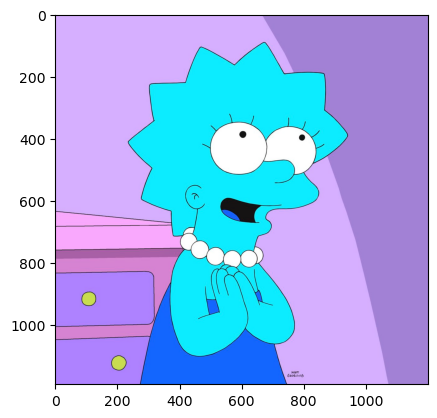

In [100]:
test_path = r'/kaggle/input/test-simpsons3/the-simpsons-lisa-1589201259.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [101]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [102]:
predictions = model.predict(prepare(img))

1/1 [==============================] - 0s 23ms/step


In [103]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

lisa_simpson
